### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import nltk

In [2]:
#Reading the excel data to a variable
data=pd.read_excel(r"C:\ML\review-details.xlsx")

In [3]:
data = data.reset_index().rename(columns={"index":"Id"})

In [4]:
#Printing some rows of the data
data.head(8)

,Id,report_date,online_store,upc,retailer_product_code,brand,category,sub_category,product_description,review_date,...,dimension2,dimension3,dimension4,dimension5,dimension6,dimension7,dimension8,verified_purchase,helpful_review_count,review_hash_id
0,0,2019-01-02,FRESHAMAZON,8718114216478,B0142CI6FC,Dove Men+Care,Personal Care,Deos,Dove Men+Care Extra Fresh Anti-perspirant Deod...,2019-01-01,...,Male Anti-Perspirant Deodorant,COTC Male Anti-Perspirant Deodorant,NaN,NaN,NaN,COTC Male Anti-Perspirant Deodorant,Core of the Core,True,0,3f129b02-ea76-0323-bd59-235d97a4f83f
1,1,2019-01-03,FRESHAMAZON,5000184201199,B014DFNNRY,Marmite,Foods,Savoury,Marmite Spread Yeast Extract 500g,2019-01-02,...,COTC Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core,True,0,d7f3b9aa-e8b3-626d-683b-374e201c8315
2,2,2019-01-03,FRESHAMAZON,5000184201199,B014DFNNRY,Marmite,Foods,Savoury,Marmite Spread Yeast Extract 500g,2019-01-02,...,COTC Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core,True,0,e58a523d-0155-a366-f107-7ac6817ac3b7
3,3,2019-01-03,FRESHAMAZON,8712566479726,B014DFKELC,Knorr,Foods,Savoury,Knorr Beef Stock Pot 8 x 28g,2019-01-02,...,Beef Stock/Pots/Cubes/Extract/Liquid/Concentrated,Stock Pots,NaN,NaN,NaN,Stock Pots,Core of the Core,True,0,aaa9bb87-4f99-bb89-65cb-3b400ebb45c0
4,4,2019-01-03,FRESHAMAZON,8717163536476,B014G37I7E,Cif,Homecare,HHC,Cif Citrus Bathroom Mousse 500ml,2019-01-02,...,Bathroom Mousse,Bathroom Mousse,NaN,NaN,NaN,NaN,Core of the Core,False,0,48c71b34-d7fe-5e90-51dd-239e153fb0ae
5,5,2019-01-04,AMAZONPRIMEPANTRY,5000184201199,B014DFNNRY,Marmite,Foods,Savoury,Marmite Spread Yeast Extract 500g,2019-01-02,...,Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core,True,0,573f07c3-5ec1-63df-bcaf-47dc8347d799
6,6,2019-01-04,AMAZONPRIMEPANTRY,5000184201199,B014DFNNRY,Marmite,Foods,Savoury,Marmite Spread Yeast Extract 500g,2019-01-02,...,Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core,True,0,3f0c3287-6197-dd68-9669-c9e6eafbf037
7,7,2019-01-04,AMAZONPRIMEPANTRY,8712566479726,B014DFKELC,Knorr,Foods,Savoury,Knorr Beef Stock Pot 8 x 28g,2019-01-02,...,Beef Stock/Pots/Cubes/Extract/Liquid/Concentrated,Stock Pots,NaN,NaN,NaN,Stock Pots,Core of the Core,True,0,91df7f82-f0be-e0fb-4726-9ca54ec408d5


In [5]:
data.columns

Index(['Id', 'report_date', 'online_store', 'upc', 'retailer_product_code',
       'brand', 'category', 'sub_category', 'product_description',
       'review_date', 'review_rating', 'review_title', 'review_text',
       'is_competitor', 'manufacturer', 'market', 'matched_keywords',
       'time_of_publication', 'url', 'review_type', 'parent_review',
       'manufacturers_response', 'dimension1', 'dimension2', 'dimension3',
       'dimension4', 'dimension5', 'dimension6', 'dimension7', 'dimension8',
       'verified_purchase', 'helpful_review_count', 'review_hash_id'],
      dtype='object')

In [6]:
#Review rating counts
print(data["review_rating"].value_counts())

review_rating
5    1848
4     319
1     146
3     107
2      81
Name: count, dtype: int64


### Representing the count of review ratings in graphical format

<Axes: title={'center': 'Review Ratings Count'}, xlabel='review_rating'>

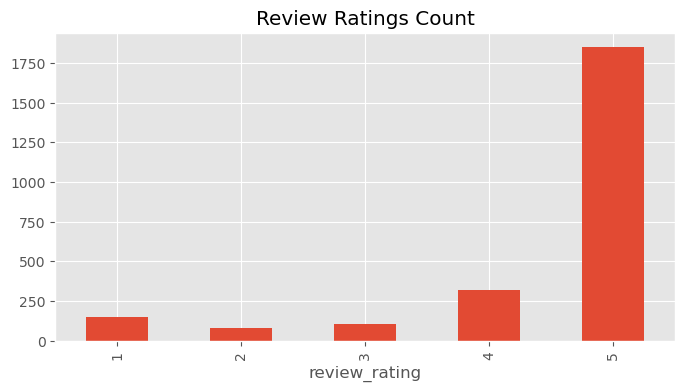

In [7]:
plt.figure(figsize=(8,4))
plt.title("Review Ratings Count")
ax=data["review_rating"].value_counts().sort_index()
ax.plot(kind="bar")

## Basic NLP

In [8]:
review_example = data['review_text'][46]
print(review_example)

excellent


In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\muche\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
tokens = nltk.word_tokenize(review_example)
tokens[:10]

['excellent']

In [11]:
from nltk.tokenize import word_tokenize

In [12]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\muche\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [13]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('excellent', 'NN')]

In [14]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\muche\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [15]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S excellent/NN)


## VADER Sentiment Scoring

In [16]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\muche\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

### Polarity_scores

In [18]:
sia.polarity_scores("This is great")

{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'compound': 0.6249}

In [19]:
sia.polarity_scores("This is the worst thing")

{'neg': 0.506, 'neu': 0.494, 'pos': 0.0, 'compound': -0.6249}

In [20]:
data["review_text"][0]

'As you get older, you know what you like and what is suitable for your body. I like all Dove products. Gives you that fresh all over, wide awake feeling and no dandruff or flakey skin. No smelly a/pits!'

In [21]:
sia.polarity_scores(data["review_text"][0])

{'neg': 0.097, 'neu': 0.703, 'pos': 0.2, 'compound': 0.5707}

In [22]:
data["review_text"][3]

'A great flavour top - up for slow cooking.'

In [23]:
sia.polarity_scores(data["review_text"][3])

{'neg': 0.0, 'neu': 0.459, 'pos': 0.541, 'compound': 0.7096}

In [24]:
#Polarity score for entire data set
res={}
for i,row in tqdm(data.iterrows(), total=len(data)):
    text = row["review_text"]
    myId = row["Id"]
    res[myId] = sia.polarity_scores(text)

  0%|          | 0/2501 [00:00<?, ?it/s]

In [25]:
for i in range(1,6):
    print(res[i])

{'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'compound': 0.8803}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5719}
{'neg': 0.0, 'neu': 0.459, 'pos': 0.541, 'compound': 0.7096}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5719}


In [26]:
vaders = pd.DataFrame(res)

In [27]:
vaders.head()

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
neg,0.0970,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0540,0.0320,0.0840,0.118,0.0000,0.0000,0.0000,0.0240,0.0000,0.0000
neu,0.7030,0.7190,0.0000,0.4590,1.0,0.0000,0.7190,0.4590,0.4480,0.3160,...,0.6900,0.8580,0.6690,0.374,0.7890,0.4640,0.7570,0.8360,0.7090,0.6330
pos,0.2000,0.2810,1.0000,0.5410,0.0,1.0000,0.2810,0.5410,0.5520,0.6840,...,0.2560,0.1100,0.2470,0.508,0.2110,0.5360,0.2430,0.1400,0.2910,0.3670
compound,0.5707,0.8803,0.5719,0.7096,0.0,0.5719,0.8803,0.7096,0.5719,0.7574,...,0.9901,0.5994,0.5994,0.807,0.9541,0.8552,0.8126,0.6745,0.6249,0.9636


In [28]:
vaders = vaders.T

In [29]:
vaders.head()

,neg,neu,pos,compound
0,0.097,0.703,0.200,0.5707
1,0.000,0.719,0.281,0.8803
2,0.000,0.000,1.000,0.5719
3,0.000,0.459,0.541,0.7096
4,0.000,1.000,0.000,0.0000


In [30]:
vaders = vaders.reset_index().rename(columns={"index":"Id"})

In [31]:
vaders.head()

,Id,neg,neu,pos,compound
0,0,0.097,0.703,0.200,0.5707
1,1,0.000,0.719,0.281,0.8803
2,2,0.000,0.000,1.000,0.5719
3,3,0.000,0.459,0.541,0.7096
4,4,0.000,1.000,0.000,0.0000


In [32]:
vaders = vaders.merge(data, how='left')

In [33]:
vaders.head()

,Id,neg,neu,pos,compound,report_date,online_store,upc,retailer_product_code,brand,...,dimension2,dimension3,dimension4,dimension5,dimension6,dimension7,dimension8,verified_purchase,helpful_review_count,review_hash_id
0,0,0.097,0.703,0.200,0.5707,2019-01-02,FRESHAMAZON,8718114216478,B0142CI6FC,Dove Men+Care,...,Male Anti-Perspirant Deodorant,COTC Male Anti-Perspirant Deodorant,NaN,NaN,NaN,COTC Male Anti-Perspirant Deodorant,Core of the Core,True,0,3f129b02-ea76-0323-bd59-235d97a4f83f
1,1,0.000,0.719,0.281,0.8803,2019-01-03,FRESHAMAZON,5000184201199,B014DFNNRY,Marmite,...,COTC Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core,True,0,d7f3b9aa-e8b3-626d-683b-374e201c8315
2,2,0.000,0.000,1.000,0.5719,2019-01-03,FRESHAMAZON,5000184201199,B014DFNNRY,Marmite,...,COTC Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core,True,0,e58a523d-0155-a366-f107-7ac6817ac3b7
3,3,0.000,0.459,0.541,0.7096,2019-01-03,FRESHAMAZON,8712566479726,B014DFKELC,Knorr,...,Beef Stock/Pots/Cubes/Extract/Liquid/Concentrated,Stock Pots,NaN,NaN,NaN,Stock Pots,Core of the Core,True,0,aaa9bb87-4f99-bb89-65cb-3b400ebb45c0
4,4,0.000,1.000,0.000,0.0000,2019-01-03,FRESHAMAZON,8717163536476,B014G37I7E,Cif,...,Bathroom Mousse,Bathroom Mousse,NaN,NaN,NaN,NaN,Core of the Core,False,0,48c71b34-d7fe-5e90-51dd-239e153fb0ae


### Plotting Vader Scores

[]

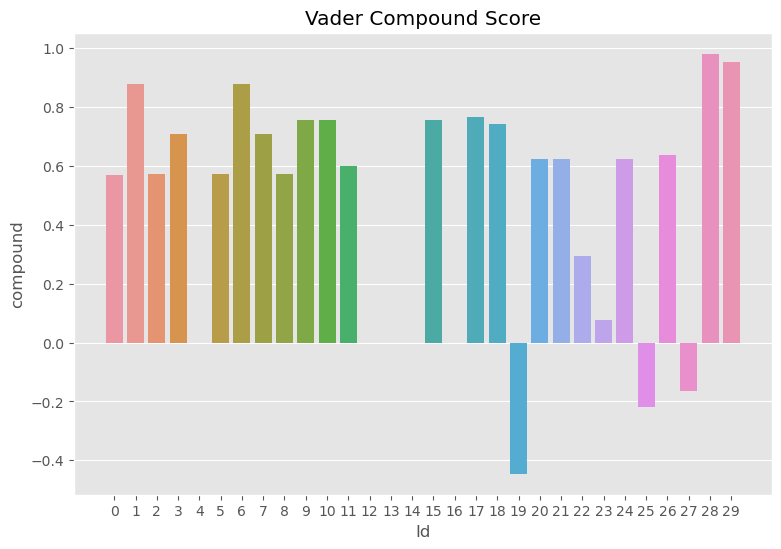

In [34]:
plt.figure(figsize=(9,6))
plt.title("Vader Compound Score")
sns.barplot(x=vaders["Id"][:30],y=vaders["compound"])
plt.plot()

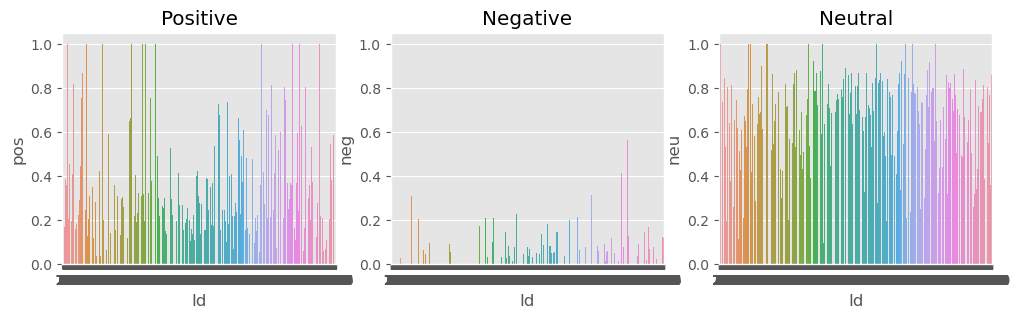

In [35]:
fig,axs = plt.subplots(1,3,figsize=(12,3))
sns.barplot(x=vaders["Id"],y=vaders["pos"],ax=axs[0])
sns.barplot(x=vaders["Id"],y=vaders["neg"],ax=axs[1])
sns.barplot(x=vaders["Id"],y=vaders["neu"],ax=axs[2])
axs[0].set_title("Positive")
axs[1].set_title("Negative")
axs[2].set_title("Neutral")
plt.tight_layout
plt.show()

## Roberta Pre-Trained Model

In [36]:
import torch

In [37]:
print(torch.__version__)

2.2.2+cpu


In [38]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [39]:
import numpy as np
import pandas as pd 
import sys
import emoji
import math
import pickle
from time import time
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn import svm
from contextlib import contextmanager
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import time
import re
import string
from scipy.sparse import csr_matrix
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import gc
from collections import defaultdict
import os
import psutil
import os

In [40]:
import tensorflow as tf

In [41]:
import tensorflow as tf
from tensorflow import keras

In [42]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(12, input_dim=8, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [43]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [44]:
# VADER results on example
print(review_example)
sia.polarity_scores(review_example)

excellent


{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5719}

In [45]:
encoded_text = tokenizer(review_example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.008278512, 'roberta_neu': 0.083049245, 'roberta_pos': 0.9086723}


In [46]:
def polarity_scores_roberta(review_example):
    encoded_text = tokenizer(review_example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [47]:
res = {}
for i, row in tqdm(data.iterrows(), total=len(data)):
    try:
        text = row['review_text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/2501 [00:00<?, ?it/s]

In [48]:
results_data = pd.DataFrame(res)

In [49]:
results_data.head()

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
vader_neg,0.097000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.054000,0.032000,0.084000,0.118000,0.000000,0.000000,0.000000,0.024000,0.000000,0.00000
vader_neu,0.703000,0.719000,0.000000,0.459000,1.000000,0.000000,0.719000,0.459000,0.448000,0.316000,...,0.690000,0.858000,0.669000,0.374000,0.789000,0.464000,0.757000,0.836000,0.709000,0.63300
vader_pos,0.200000,0.281000,1.000000,0.541000,0.000000,1.000000,0.281000,0.541000,0.552000,0.684000,...,0.256000,0.110000,0.247000,0.508000,0.211000,0.536000,0.243000,0.140000,0.291000,0.36700
vader_compound,0.570700,0.880300,0.571900,0.709600,0.000000,0.571900,0.880300,0.709600,0.571900,0.757400,...,0.990100,0.599400,0.599400,0.807000,0.954100,0.855200,0.812600,0.674500,0.624900,0.96360
roberta_neg,0.015673,0.003519,0.168246,0.003667,0.103703,0.168246,0.003519,0.003667,0.004059,0.001823,...,0.183785,0.342626,0.008776,0.002235,0.006003,0.001708,0.001076,0.362866,0.042137,0.00192


In [50]:
results_data = pd.DataFrame(res).T

In [51]:
results_data.head()

,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
0,0.097,0.703,0.200,0.5707,0.015673,0.181881,0.802446
1,0.000,0.719,0.281,0.8803,0.003519,0.027669,0.968813
2,0.000,0.000,1.000,0.5719,0.168246,0.480159,0.351595
3,0.000,0.459,0.541,0.7096,0.003667,0.042841,0.953492
4,0.000,1.000,0.000,0.0000,0.103703,0.744910,0.151387


In [52]:
results_data = results_data.reset_index().rename(columns={'index': 'Id'})

In [53]:
results_data = results_data.merge(vaders, how='left')

In [54]:
results_data.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,neg,neu,...,dimension2,dimension3,dimension4,dimension5,dimension6,dimension7,dimension8,verified_purchase,helpful_review_count,review_hash_id
0,0,0.097,0.703,0.200,0.5707,0.015673,0.181881,0.802446,0.097,0.703,...,Male Anti-Perspirant Deodorant,COTC Male Anti-Perspirant Deodorant,NaN,NaN,NaN,COTC Male Anti-Perspirant Deodorant,Core of the Core,True,0,3f129b02-ea76-0323-bd59-235d97a4f83f
1,1,0.000,0.719,0.281,0.8803,0.003519,0.027669,0.968813,0.000,0.719,...,COTC Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core,True,0,d7f3b9aa-e8b3-626d-683b-374e201c8315
2,2,0.000,0.000,1.000,0.5719,0.168246,0.480159,0.351595,0.000,0.000,...,COTC Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core,True,0,e58a523d-0155-a366-f107-7ac6817ac3b7
3,3,0.000,0.459,0.541,0.7096,0.003667,0.042841,0.953492,0.000,0.459,...,Beef Stock/Pots/Cubes/Extract/Liquid/Concentrated,Stock Pots,NaN,NaN,NaN,Stock Pots,Core of the Core,True,0,aaa9bb87-4f99-bb89-65cb-3b400ebb45c0
4,4,0.000,1.000,0.000,0.0000,0.103703,0.744910,0.151387,0.000,1.000,...,Bathroom Mousse,Bathroom Mousse,NaN,NaN,NaN,NaN,Core of the Core,False,0,48c71b34-d7fe-5e90-51dd-239e153fb0ae


In [56]:
results_data.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'neg', 'neu', 'pos',
       'compound', 'report_date', 'online_store', 'upc',
       'retailer_product_code', 'brand', 'category', 'sub_category',
       'product_description', 'review_date', 'review_rating', 'review_title',
       'review_text', 'is_competitor', 'manufacturer', 'market',
       'matched_keywords', 'time_of_publication', 'url', 'review_type',
       'parent_review', 'manufacturers_response', 'dimension1', 'dimension2',
       'dimension3', 'dimension4', 'dimension5', 'dimension6', 'dimension7',
       'dimension8', 'verified_purchase', 'helpful_review_count',
       'review_hash_id'],
      dtype='object')

## Comparing Scores

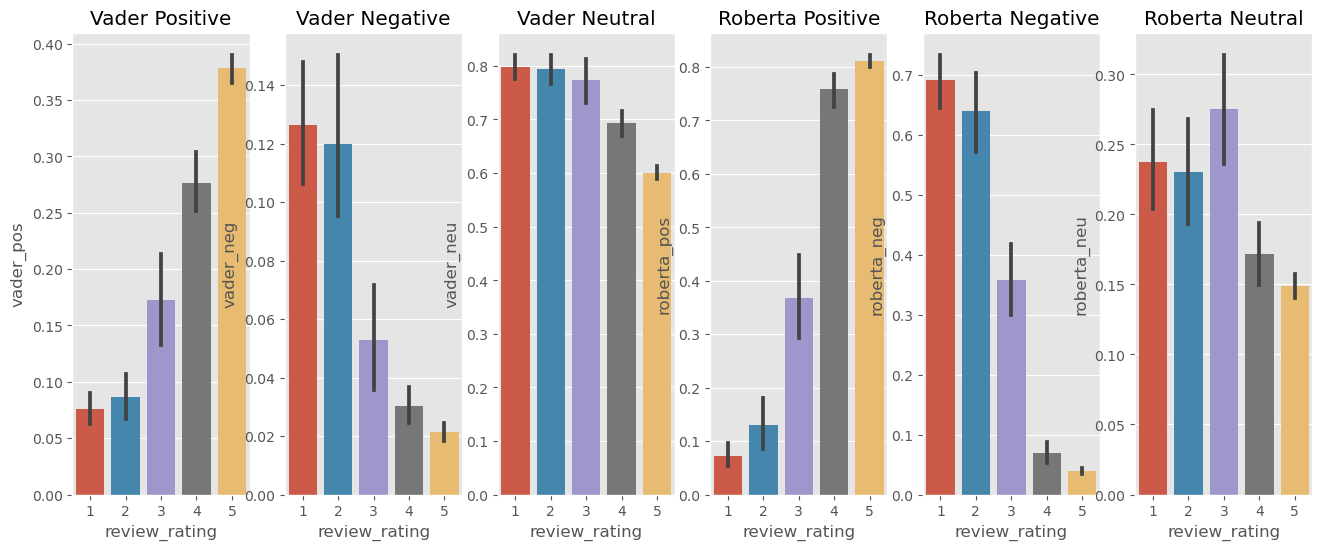

In [67]:
fig,axs = plt.subplots(1,6,figsize=(16,6))
sns.barplot(x=results_data["review_rating"],y=results_data["vader_pos"],ax=axs[0])
sns.barplot(x=results_data["review_rating"],y=results_data["vader_neg"],ax=axs[1])
sns.barplot(x=results_data["review_rating"],y=results_data["vader_neu"],ax=axs[2])
sns.barplot(x=results_data["review_rating"],y=results_data["roberta_pos"],ax=axs[3])
sns.barplot(x=results_data["review_rating"],y=results_data["roberta_neg"],ax=axs[4])
sns.barplot(x=results_data["review_rating"],y=results_data["roberta_neu"],ax=axs[5])
axs[0].set_title("Vader Positive")
axs[1].set_title("Vader Negative")
axs[2].set_title("Vader Neutral")
axs[3].set_title("Roberta Positive")
axs[4].set_title("Roberta Negative")
axs[5].set_title("Roberta Neutral")
plt.tight_layout
plt.show()

## Pipeline

In [68]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [88]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [70]:
sent_pipeline('I hate  sentiment analysis!')

[{'label': 'NEGATIVE', 'score': 0.9992958307266235}]

In [71]:
sent_pipeline('I may like sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9128923416137695}]

In [72]:
sent_pipeline('Make sure to love all the people around')

[{'label': 'POSITIVE', 'score': 0.9998791217803955}]

In [73]:
sent_pipeline('booo')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]

In [74]:
sent_pipeline('cringe')

[{'label': 'NEGATIVE', 'score': 0.9997017979621887}]

In [75]:
sent_pipeline('Not a bad product')

[{'label': 'POSITIVE', 'score': 0.9987743496894836}]

In [89]:
sent_pipeline('I loved using the dove shampoo but for some reasons it is making making my hair too smooth which is not a good thing')

[{'label': 'NEGATIVE', 'score': 0.9996610879898071}]

In [90]:
sent_pipeline('The product had both pros and cons')

[{'label': 'NEGATIVE', 'score': 0.5180395245552063}]

In [91]:
sent_pipeline('It is the least recommended product for anyone except for the people who are suffering with high fat')

[{'label': 'NEGATIVE', 'score': 0.9992231130599976}]

In [93]:
a=input("Review:")
print("Sentiment Analysis:",sent_pipeline(a))

Review:it is a bad product for humans
Sentiment Analysis: [{'label': 'NEGATIVE', 'score': 0.9998083710670471}]


In [94]:
a=input("Review:")
print("Sentiment Analysis:",sent_pipeline(a))

Review:s you get older, you know what you like and what is suitable for your body. I like all Dove products. Gives you that fresh all over, wide awake feeling and no dandruff or flakey skin. No smelly a/pits!
Sentiment Analysis: [{'label': 'POSITIVE', 'score': 0.992506206035614}]


In [97]:
a=input("Review:")
print("Sentiment Analysis:",sent_pipeline(a))

Review:Excellent
Sentiment Analysis: [{'label': 'POSITIVE', 'score': 0.9998434782028198}]


In [107]:
a= input("Review:")
print("Sentiment Analysis:",sent_pipeline(a))

Review:bad
Sentiment Analysis: [{'label': 'NEGATIVE', 'score': 0.999782383441925}]


In [109]:
n = int(input("Number of comments:"))
for i in range(n):
    a=input("Review:")
    print("Sentiment Analysis:",sent_pipeline(a))

Number of comments:5
Review:great product for daily use
Sentiment Analysis: [{'label': 'POSITIVE', 'score': 0.9997887015342712}]
Review:not as remarkable as expected
Sentiment Analysis: [{'label': 'NEGATIVE', 'score': 0.9997592568397522}]
Review:Fine 
Sentiment Analysis: [{'label': 'POSITIVE', 'score': 0.9998335838317871}]
Review:Average product 
Sentiment Analysis: [{'label': 'NEGATIVE', 'score': 0.9676812291145325}]
Review:excellent product for teenagers who wants to reach higher positions
Sentiment Analysis: [{'label': 'POSITIVE', 'score': 0.9996830224990845}]


In [110]:
n = int(input("Number of comments:"))
for i in range(n):
    a=input("Review:")
    print("Sentiment Analysis:",sent_pipeline(a))

Number of comments:3
Review:great work 
Sentiment Analysis: [{'label': 'POSITIVE', 'score': 0.9998679161071777}]
Review:wanted to use it for an year but stopped after a week
Sentiment Analysis: [{'label': 'NEGATIVE', 'score': 0.9975029826164246}]
Review:recommended product
Sentiment Analysis: [{'label': 'POSITIVE', 'score': 0.9997091889381409}]
